In [1]:
import sys
import os

# Add the src folder to the system path
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from create_fold import regression_stratified
from analyze import numerical_feature

In [3]:
help(regression_stratified)

Help on function regression_stratified in module create_fold:

regression_stratified(file_path, target_column, n_splits=5, binning_method='sturges', custom_bins=None, random_state=42, save_path=None)
    Creates stratified K-Fold indices for regression tasks with various binning methods from a CSV file.

    Parameters:
    file_path (str): Path to the input CSV file containing the dataset.
    target_column (str): The name of the target column.
    n_splits (int): Number of folds. Default is 5.
    binning_method (str): Method for binning the target variable. Options are 'sturges', 'quantile', 'kmeans', 'custom'. Default is 'sturges'.
    custom_bins (list): List of bin edges for custom binning. Required if binning_method is 'custom'.
    random_state (int): Seed for the random number generator. Default is 42.
    save_path (str): Optional path to save the CSV file. If None, the file is not saved. Default is None.

    Returns:
    pd.DataFrame: DataFrame with an additional 'kfold' co

In [4]:
df = pd.read_csv('../input/train.csv')
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


## Create folds for training

In [5]:
df = regression_stratified(file_path='../input/train.csv', target_column='MedHouseVal', n_splits=5, save_path='../input/train_folds.csv')

In [6]:
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,kfold
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980,0
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946,3
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576,4
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336,0
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500,3


In [7]:
help(numerical_feature)

Help on function numerical_feature in module analyze:

numerical_feature(df, feature, target=None, figsize=(15, 6), bins='sturges')
    Analyzes a numerical feature in a dataframe.
    Parameters:
    - df (pandas.DataFrame): The dataframe containing the data.
    - feature (str): The name of the numerical feature to analyze.
    - target (str, optional): The name of the target column for grouping the analysis. Default is None.
    - figsize (tuple, optional): The size of the figure. Default is (15, 6).
    - bins (int, str, optional): The number of bins for the histogram or the method to calculate it. Default is 'sturges'.
    Returns:
    - outliers_df (pandas.DataFrame): A dataframe containing the percentage of outliers in the data.
    - summary_df (pandas.DataFrame): A dataframe containing the overall statistics, lower outliers statistics, and upper outliers statistics.



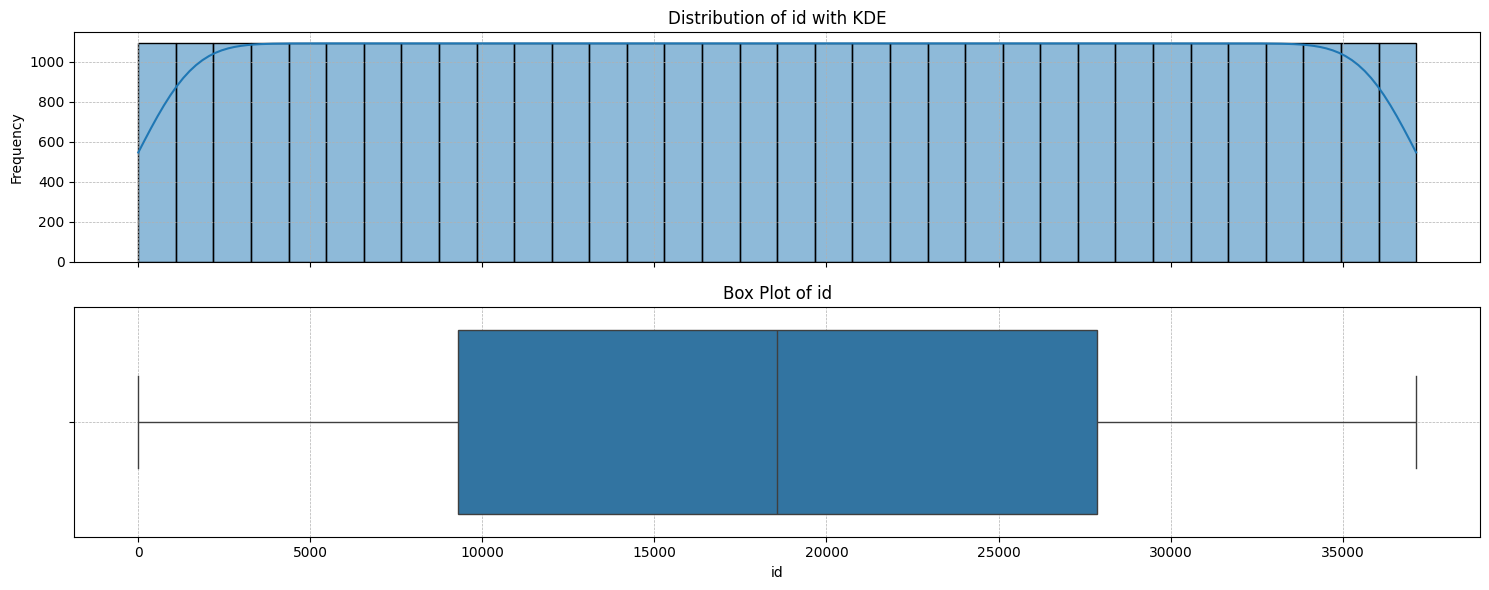

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
id_Overall,37137.0,18568.0,10720.67281,0.0,9284.0,18568.0,27852.0,37136.0
id_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


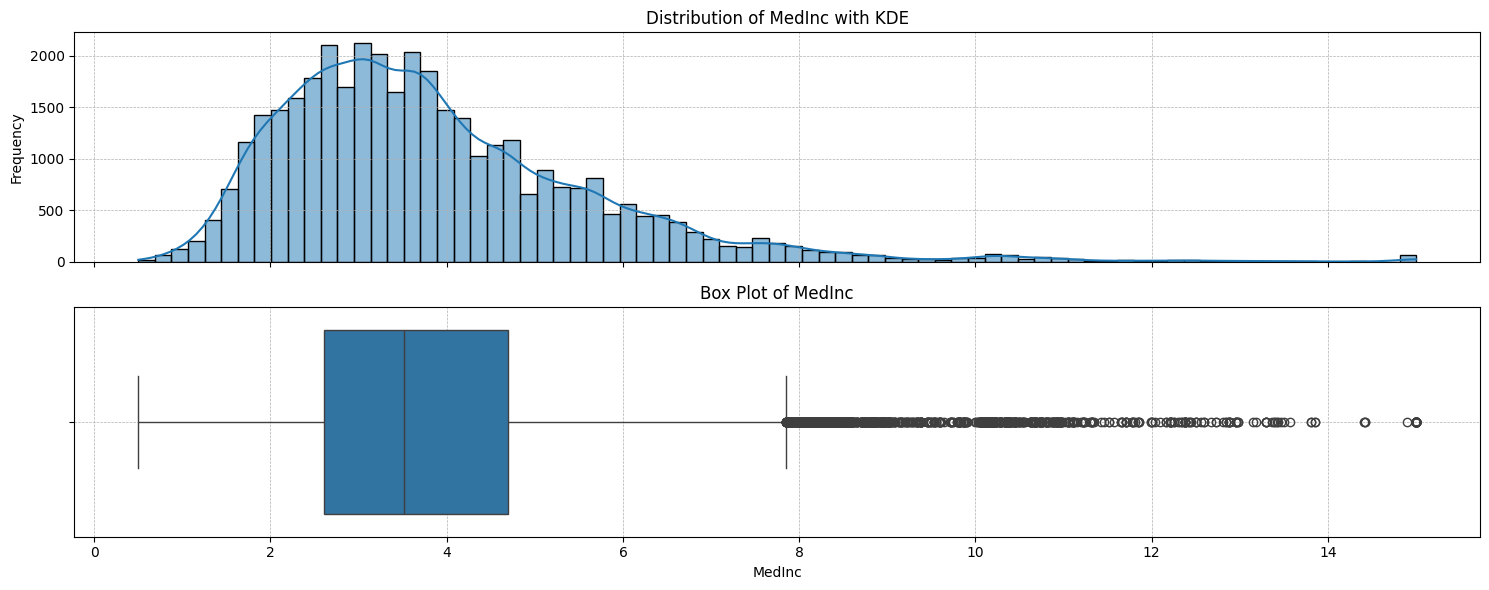

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,3.126262,0.0,3.126262


,count,mean,std,min,25%,50%,75%,max
MedInc_Overall,37137.0,3.851029,1.803167,0.4999,2.6023,3.5156,4.6997,15.0001
MedInc_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MedInc_Upper_Outliers,1161.0,9.728466,1.865159,7.8476,8.2887,9.0064,10.4836,15.0001


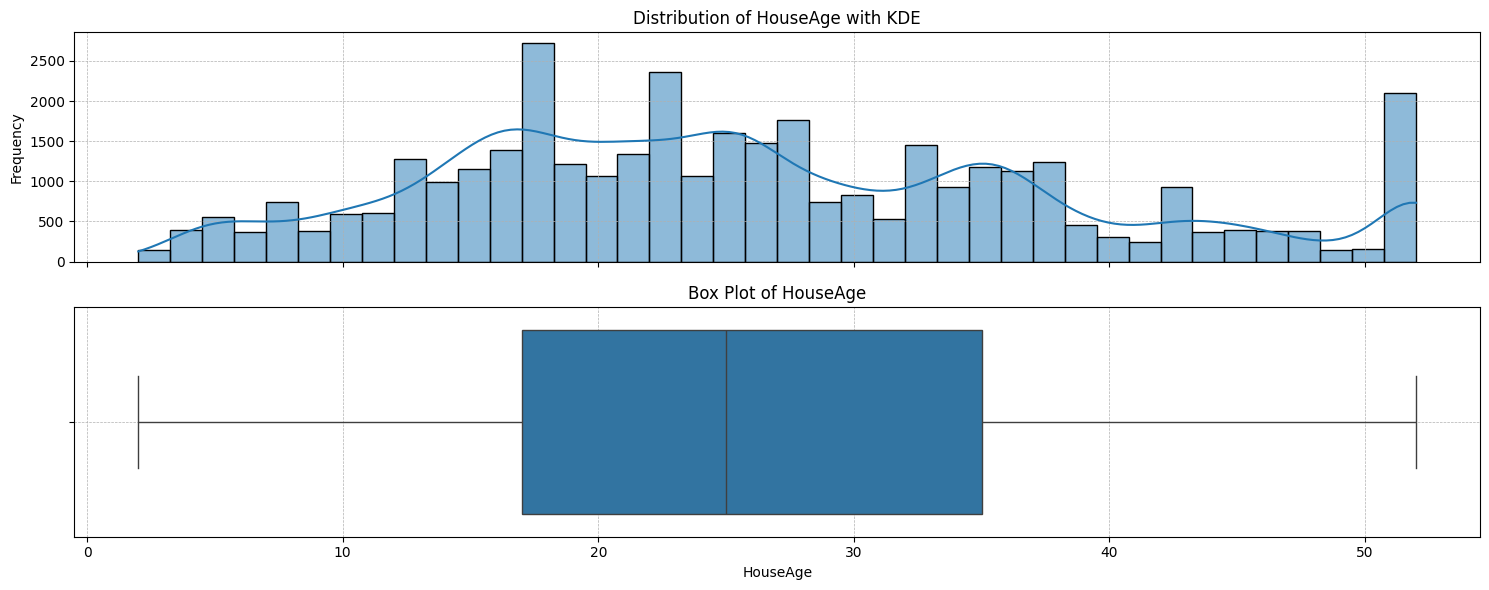

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
HouseAge_Overall,37137.0,26.057005,12.158221,2.0,17.0,25.0,35.0,52.0
HouseAge_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseAge_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


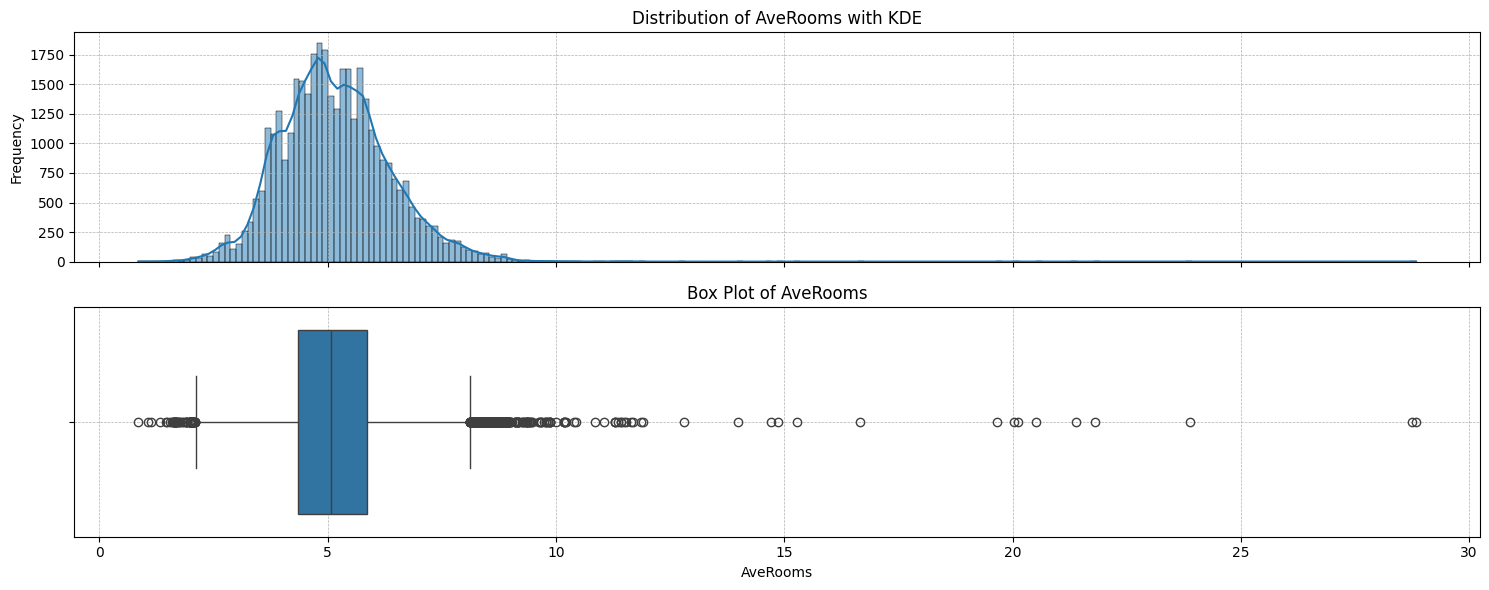

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,1.521394,0.199262,1.322132


,count,mean,std,min,25%,50%,75%,max
AveRooms_Overall,37137.0,5.163124,1.206242,0.851064,4.357522,5.068611,5.858597,28.837607
AveRooms_Lower_Outliers,74.0,1.850335,0.253797,0.851064,1.680819,1.981462,2.017095,2.099778
AveRooms_Upper_Outliers,491.0,9.028353,2.147239,8.111622,8.305344,8.527294,8.857584,28.837607


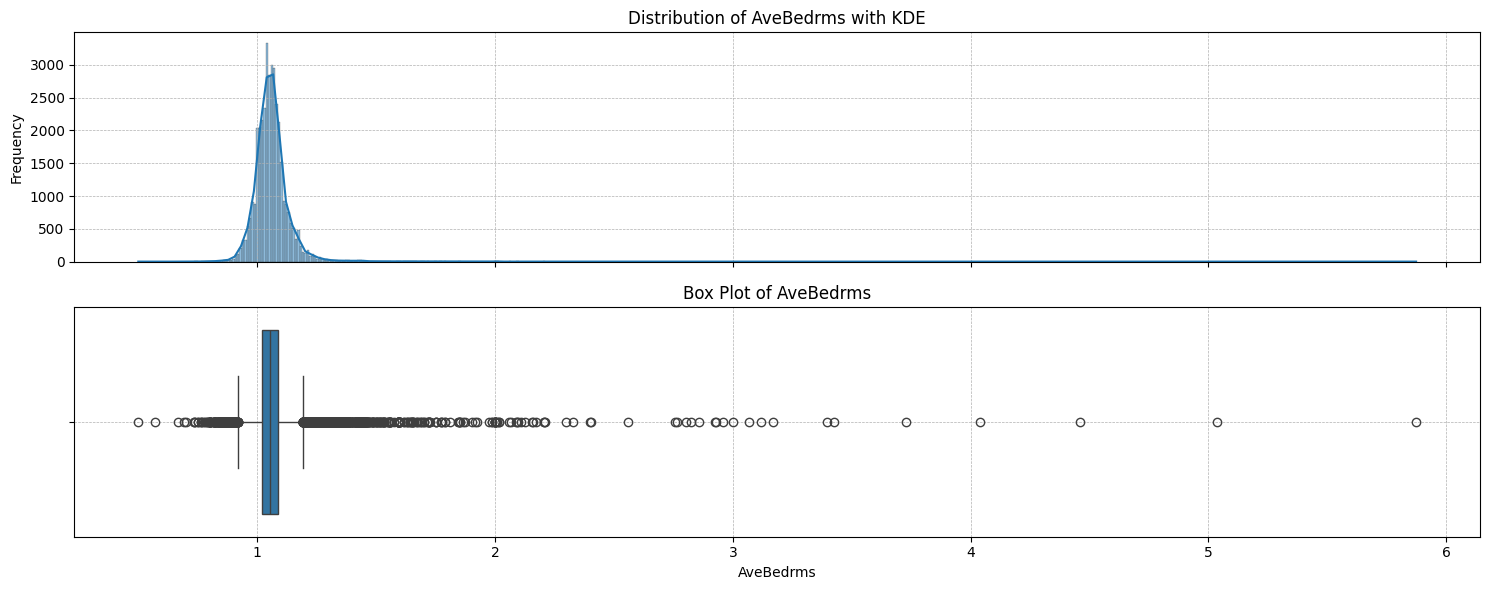

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,4.332606,0.86706,3.465546


,count,mean,std,min,25%,50%,75%,max
AveBedrms_Overall,37137.0,1.062204,0.096490,0.500000,1.020305,1.054545,1.088825,5.873181
AveBedrms_Lower_Outliers,322.0,0.875545,0.050414,0.500000,0.858735,0.891986,0.907749,0.917403
AveBedrms_Upper_Outliers,1287.0,1.343824,0.327419,1.191651,1.213942,1.245399,1.339768,5.873181


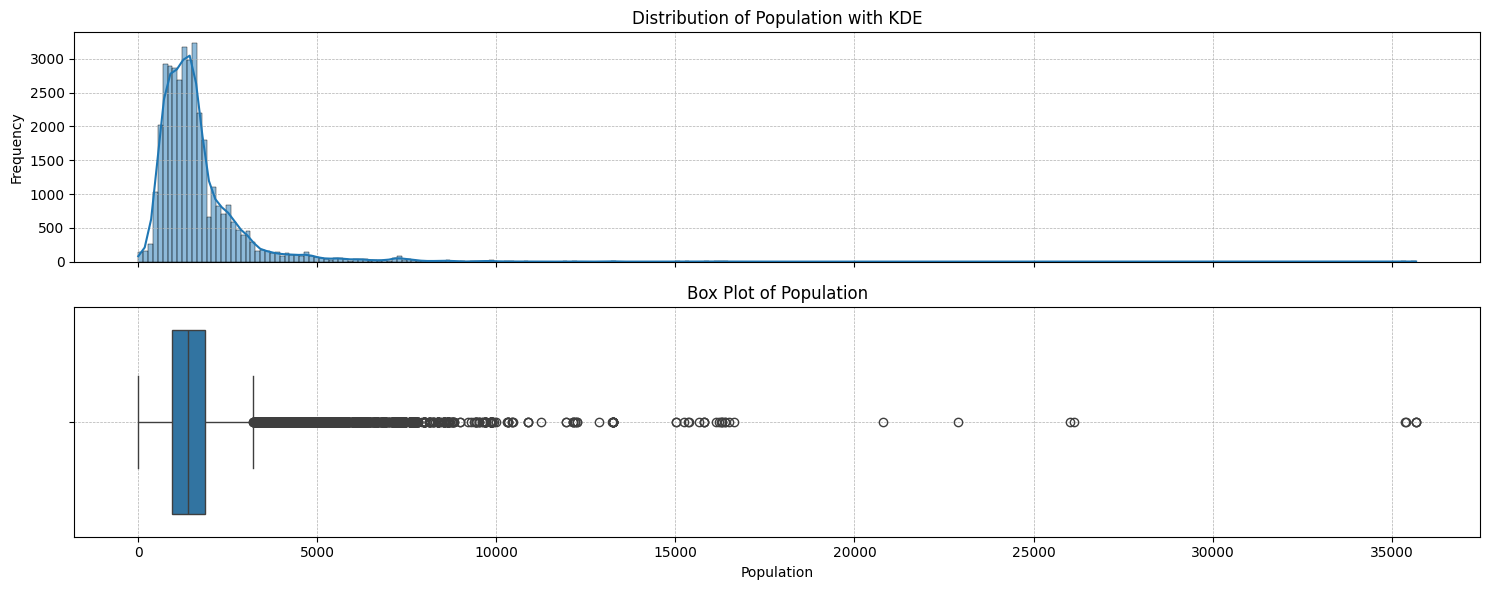

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,6.737216,0.0,6.737216


,count,mean,std,min,25%,50%,75%,max
Population_Overall,37137.0,1660.778919,1302.469608,3.0,952.00,1383.0,1856.0,35682.0
Population_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population_Upper_Outliers,2502.0,5202.986703,2486.003675,3215.0,3745.25,4529.5,5899.0,35682.0


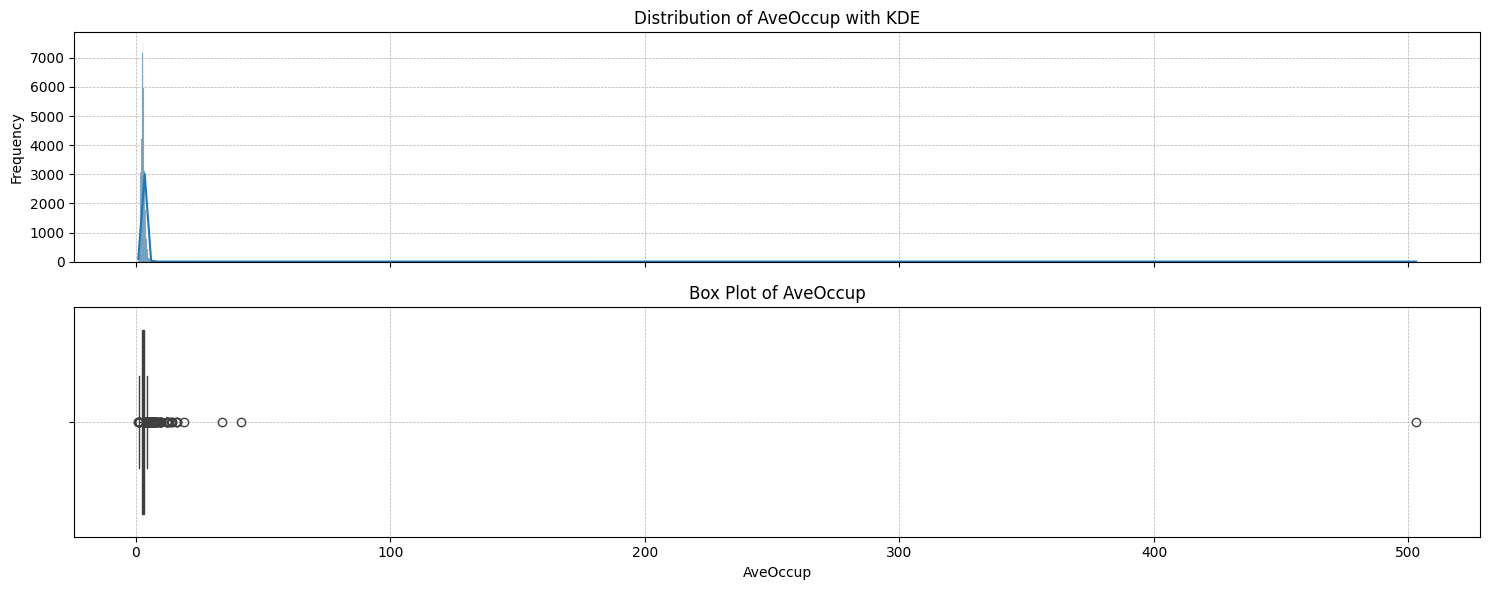

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,3.769825,0.026927,3.742898


,count,mean,std,min,25%,50%,75%,max
AveOccup_Overall,37137.0,2.831243,2.702413,0.950000,2.394495,2.744828,3.125313,502.990610
AveOccup_Lower_Outliers,10.0,1.148306,0.126123,0.950000,1.075540,1.192654,1.245010,1.280604
AveOccup_Upper_Outliers,1390.0,5.253154,13.466985,4.221729,4.367571,4.588031,4.911433,502.990610


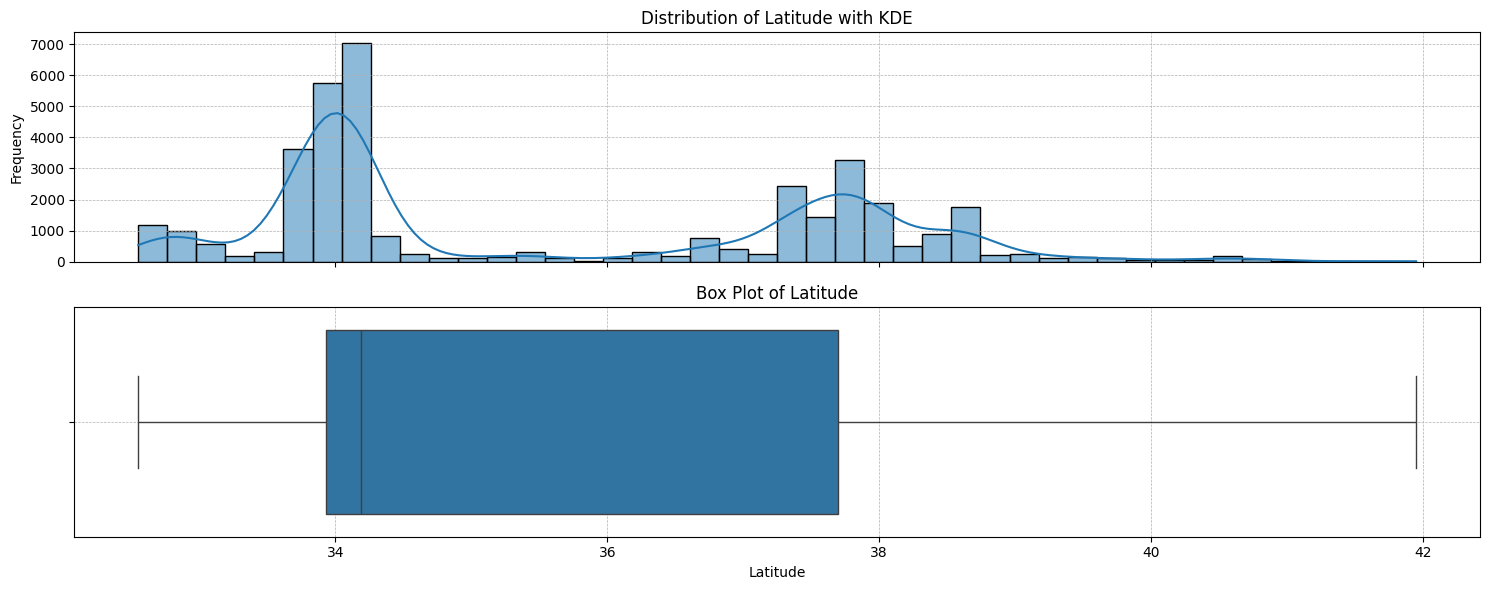

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Latitude_Overall,37137.0,35.57003,2.083179,32.55,33.93,34.19,37.7,41.95
Latitude_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


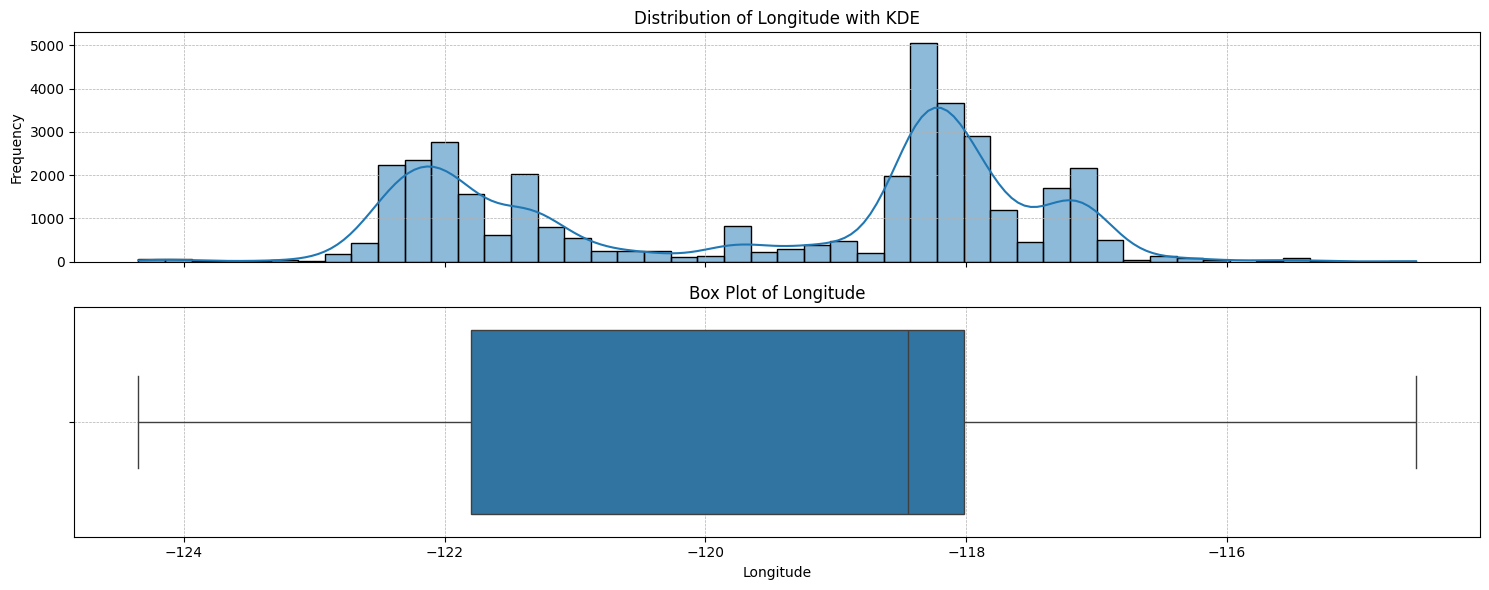

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Longitude_Overall,37137.0,-119.554329,1.974028,-124.35,-121.8,-118.45,-118.02,-114.55
Longitude_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longitude_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


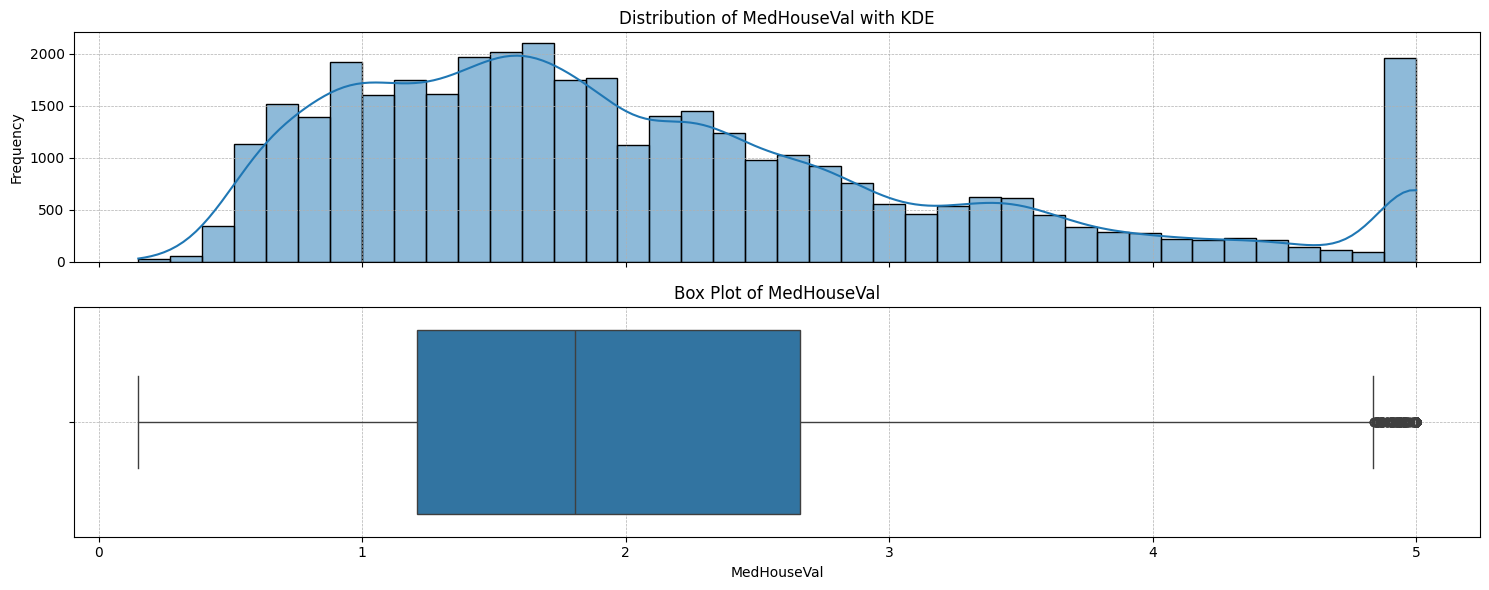

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,5.380079,0.0,5.380079


,count,mean,std,min,25%,50%,75%,max
MedHouseVal_Overall,37137.0,2.079751,1.158571,0.14999,1.20800,1.80800,2.66000,5.00001
MedHouseVal_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MedHouseVal_Upper_Outliers,1998.0,4.994413,0.024223,4.84100,5.00001,5.00001,5.00001,5.00001


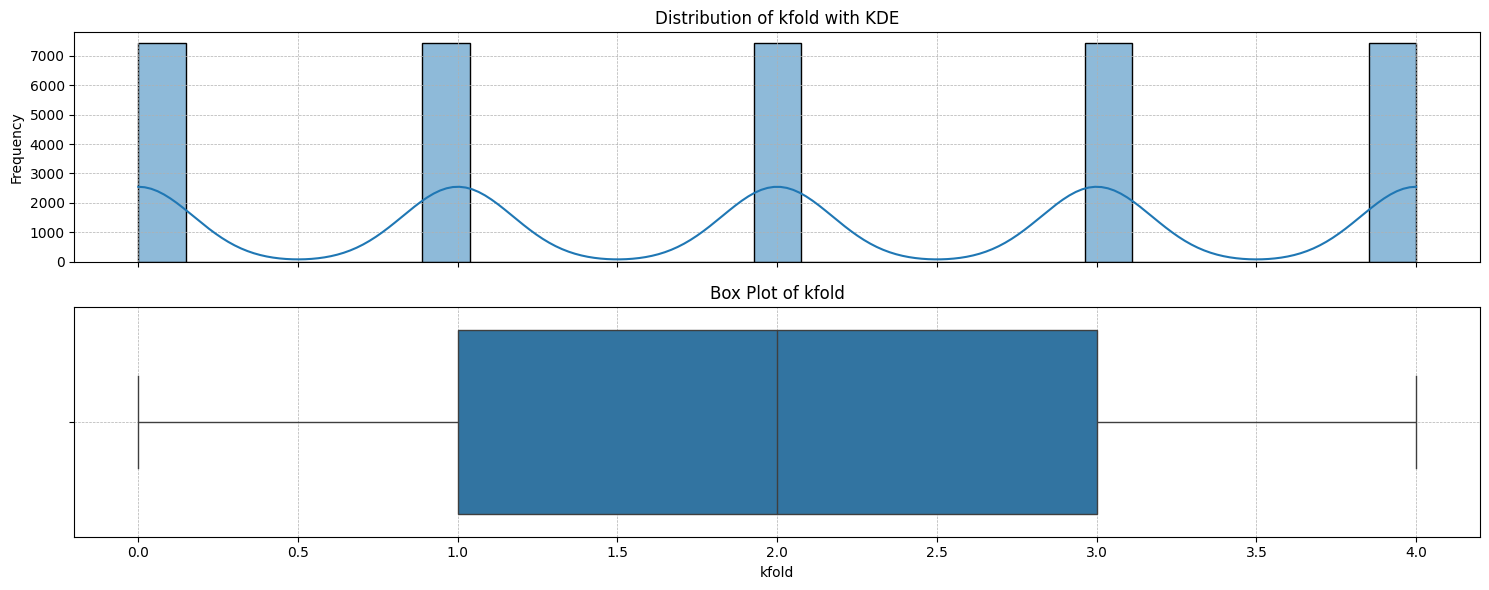

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
kfold_Overall,37137.0,1.999919,1.414242,0.0,1.0,2.0,3.0,4.0
kfold_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kfold_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    outlier, summary = numerical_feature(df, feature=col, bins='scott')
    display(outlier)
    display(summary)